# Regression

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

We need the insurance dataset again. Pleat load it from https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [2]:
sample = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

Make sure the data is loaded correctly by looking at the first lines.

In [3]:
sample.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


What are the main statistics from the dataset? (describe)

In [4]:
sample.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Linear Model

In [5]:
from sklearn import linear_model

## Fitting a model

The first thing we would like to do is to fit a linear model. As dependent variable, we take charges, as independent variables bmi, age and children.

In [6]:
m_lin = linear_model.LinearRegression()
X = sample[['bmi', 'age', 'children']]
m_lin.fit(X=X, y=sample['charges'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

To get an idea of the relative importance of the features, one can multiply the coefficients of the model with the standard deviation of the variables.

In [7]:
np.std(X) * m_lin.coef_

bmi         2024.349519
age         3370.652562
children     654.174800
dtype: float64


Let us try again, but this time with age, bmi and smoker. Children were less of importance. Note that smoker is a categorical variable.

In [8]:
X = pd.get_dummies(sample[['bmi', 'age', 'smoker']], drop_first=True)
X.head()

,bmi,age,smoker_yes
0,27.900,19,1
1,33.770,18,0
2,33.000,28,0
3,22.705,33,0
4,28.880,32,0


In [9]:
m_lin.fit(X=X, y=sample['charges'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

What is the relative importance of smoking?

In [10]:
np.std(X) * m_lin.coef_

bmi           1966.632053
age           3645.269001
smoker_yes    9613.884735
dtype: float64

Predict the charges for person a (age 20, bmi 20, smoker) and person b (age 50, bmi 20, non-smoker)

In [11]:
m_lin.predict(pd.DataFrame({'age':[20,50], 'bmi':[20,20], 'smoker_yes':[1,0]}))

array([ 23790.10655754,   9644.8760468 ])

## Testing a model

To evaluate a model, it's a good idea to split the data into a train and a test set. In this way, we can discover how the algorithm would perform on unseen data.

Take a sample of 80% of the data for training, keep 20% for testing.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, sample['charges'], test_size = 0.2, random_state = 2017)

In [14]:
print(X_train.shape)
print(X_test.shape)

(1070, 3)
(268, 3)


Fit a linear model for charges on bmi, age and smoker, using the training set.

In [15]:
m_lin = linear_model.LinearRegression()
m_lin.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Compute the root mean square error (rmse) and the mean absolute error (mae) of the model based on test data.

In [16]:
yhat_lin_test = m_lin.predict(X_test)

In [17]:
import sklearn.metrics as met

In [18]:
print(np.sqrt(met.mean_squared_error(y_true=y_test, y_pred=yhat_lin_test)))
print(met.mean_absolute_error(y_true=y_test, y_pred=yhat_lin_test))

5832.54836267
3952.60425818


# Regression Trees

Next to linear models, we can fit regression trees.

In [19]:
from sklearn import tree
import graphviz # for visualizing the tree model. --> conda install python-graphviz

Fit a CART regression tree for charges on bmi, age and smoker on the whole dataset. To keep the tree parsimonious, limit the number of leafs to 3.

In [20]:
m_tree = tree.DecisionTreeRegressor(max_leaf_nodes = 3, random_state = 2017)
m_tree.fit(X=X, y=sample['charges'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2017, splitter='best')

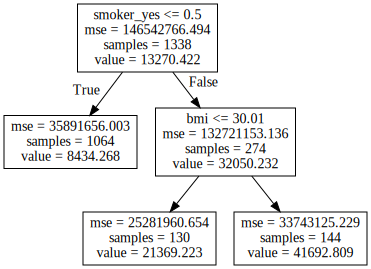

In [21]:
graphviz.Source(tree.export_graphviz(m_tree, out_file = None, feature_names = list(X)))

Note that the values are the average on the dataset under the classification. The top node has the average of the whole dataset.

Predict the charges for person a (age 20, bmi 20, smoker) and person b (age 50, bmi 20, non-smoker)

In [22]:
m_tree.predict(pd.DataFrame({'age':[20,50], 'bmi':[20,20], 'smoker_yes':[1,0]}))

array([ 21369.22328508,   8434.26829786])

Now fit the same model on the train set.

In [23]:
m_tree.fit(X=X_train, y=y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2017, splitter='best')

Compute the rmse and mae for the train set.

In [24]:
yhat_tree_train = m_tree.predict(X=X_train)
print(np.sqrt(met.mean_squared_error(y_true=y_train, y_pred=yhat_tree_train)))
print(met.mean_absolute_error(y_true=y_train, y_pred=yhat_tree_train))

5952.3015673
4475.93970788


Compute the rmse and mae for the test set.

In [25]:
yhat_tree_test = m_tree.predict(X=X_test)
print(np.sqrt(met.mean_squared_error(y_true=y_test, y_pred=yhat_tree_test)))
print(met.mean_absolute_error(y_true=y_test, y_pred=yhat_tree_test))

5639.80009605
4345.53474829
